#Data : Mall_Customers from kaggle

ต้องการแบ่งกลุ่มลูกค้าเป็นจำนวนที่เหมาะสมจาก feature columns ต่างๆ คือ Genre ,Age,	Annual Income (k$),	Spending Score (1-100) 

column spending score : Score assigned by the mall based on customer behavior and spending nature

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#EDA

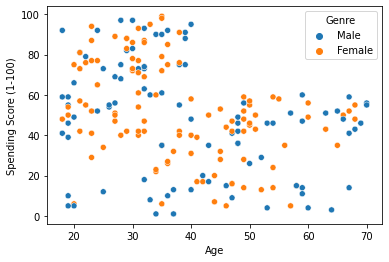

In [ ]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Genre')

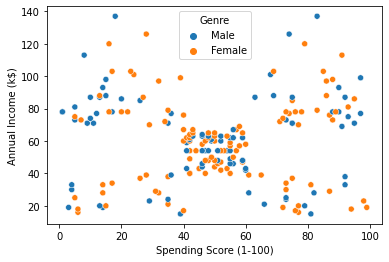

In [ ]:
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Genre')

In [ ]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

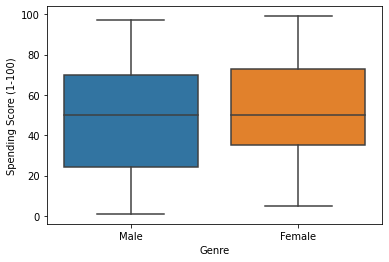

In [ ]:
sns.boxplot(data=df,x='Genre',y='Spending Score (1-100)')

# clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df.drop('CustomerID',axis=1)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
scaled_X[:5]

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
SumSqaureDistance = []
for k in range(2,7):
  model = KMeans(n_clusters=k)
  model.fit(scaled_X)
  SumSqaureDistance.append(model.inertia_)

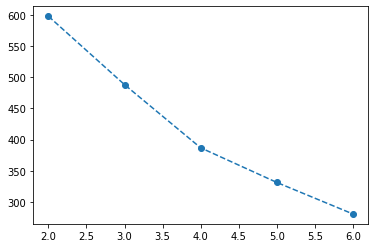

In [ ]:
plt.plot(range(2,7),SumSqaureDistance,'--o')
#elblow method 

In [ ]:
scaled_X

In [ ]:
model = KMeans(n_clusters=5)
model.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([3, 3, 4, 0, 0, 0, 4, 0, 1, 0, 1, 0, 4, 0, 1, 3, 4, 3, 1, 0, 1, 3,
       4, 3, 4, 3, 4, 3, 4, 0, 1, 0, 1, 3, 4, 0, 4, 0, 4, 0, 4, 3, 1, 0,
       4, 0, 4, 0, 0, 0, 4, 3, 0, 1, 4, 1, 4, 1, 0, 1, 1, 3, 4, 4, 1, 3,
       4, 4, 3, 0, 1, 4, 4, 4, 1, 3, 4, 3, 0, 4, 1, 3, 1, 4, 0, 1, 4, 0,
       0, 4, 4, 3, 1, 4, 0, 3, 4, 0, 1, 3, 0, 4, 1, 3, 1, 0, 4, 1, 1, 1,
       1, 0, 4, 3, 0, 0, 4, 4, 4, 4, 3, 4, 0, 3, 0, 0, 2, 3, 1, 3, 2, 3,
       0, 0, 2, 0, 4, 3, 2, 0, 4, 3, 0, 0, 2, 3, 2, 0, 4, 3, 2, 3, 4, 0,
       4, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 4, 3, 2, 3, 2, 3, 4, 0,
       2, 3, 2, 3, 4, 0, 2, 0, 4, 3, 4, 3, 4, 0, 4, 0, 2, 0, 4, 0, 4, 3,
       2, 3], dtype=int32)

In [ ]:
X['K=5 Cluster Labels'] = model.labels_

In [ ]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,K=5 Cluster Labels
0,19,15,39,0,1,3
1,21,15,81,0,1,3
2,20,16,6,1,0,4
3,23,16,77,1,0,0
4,31,17,40,1,0,0


In [ ]:
X.corr()['K=5 Cluster Labels'].sort_values()

Spending Score (1-100)   -0.303246
Genre_Female             -0.056658
Annual Income (k$)        0.041201
Genre_Male                0.056658
Age                       0.283186
K=5 Cluster Labels        1.000000
Name: K=5 Cluster Labels, dtype: float64

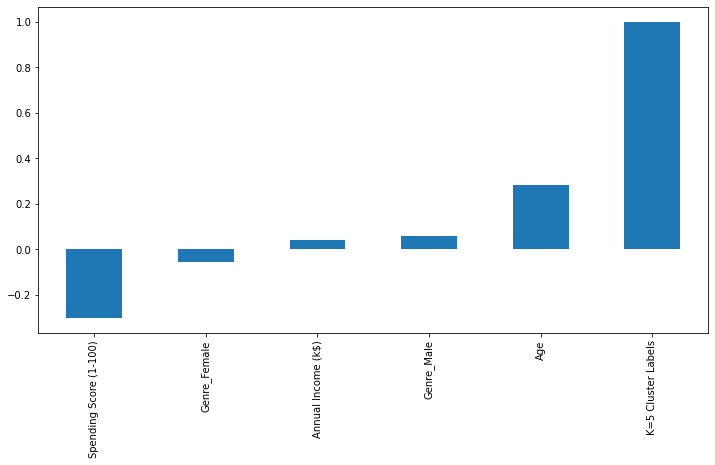

In [ ]:
plt.figure(figsize=(12,6))
X.corr()['K=5 Cluster Labels'].sort_values().plot(kind='bar')

ปัจจัยที่มีผลอย่างมากในการแบ่งข้อมูลชุดนี้ออกเป็น 5 กลุ่ม(จาก elblow method) คือ Age , Spending Score